<a href="https://colab.research.google.com/github/tnc-br/ddf_common/blob/minimal_training/vi_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variational model

Find the mean/variance of O18 ratios (as well as N15 and C13 in the future) at a particular lat/lon across Brazil.

In [28]:
import importlib
from datetime import datetime
import sys
import os

# Import libraries required

In [2]:
!if [ ! -d "/content/ddf_common_stub" ] ; then git clone -b test https://github.com/tnc-br/ddf_common_stub.git; fi
sys.path.append("/content/ddf_common_stub/")
import ddfimport
ddfimport.ddf_source_control_pane()

Cloning into 'ddf_common_stub'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 7.36 KiB | 7.36 MiB/s, done.
Resolving deltas: 100% (7/7), done.


interactive(children=(Text(value='', description='Email', placeholder='Enter email'), Text(value='', descripti…

In [63]:
import train_variational_inference_model as tvim
import dataset
import raster
import model
importlib.reload(tvim)
importlib.reload(dataset)
importlib.reload(model)

<module 'model' from '/content/gdrive/MyDrive/minimal_training/ddf_common/model.py'>

# Model configuration

In [47]:
params = tvim.VIModelTrainingParams(
    training_id = "test-2024-06-21", #@param
    num_epochs = 5000, #@param
    num_layers = 2, #@param
    num_nodes_per_layer = 20, #@param
    training_batch_size = 5, #@param
    learning_rate = 0.0001, #@param
    mean_label = "d18O_cel_mean", #@param
    var_label = "d18O_cel_variance", #@param
    early_stopping_patience = 100, #@param
    double_sided_kl = False, #@param
    kl_num_samples_from_pred_dist = 15, #@param
    features_to_standardize = ['lat', 'long', 'VPD', 'RH', 'PET', 'DEM', 'PA', 'Mean Annual Temperature', 'Mean Annual Precipitation', 'Iso_Oxi_Stack_mean_TERZER', 'isoscape_fullmodel_d18O_prec_REGRESSION', 'brisoscape_mean_ISORIX', 'd13C_cel_mean', 'd13C_cel_var', 'ordinary_kriging_linear_d18O_predicted_mean', 'ordinary_kriging_linear_d18O_predicted_variance'], #@param
    features_to_passthrough = [], #@param
    resolution_x = 1024, #@param
    resolution_y = 1024, #@param
)

# Data configuration

In [60]:
from google.colab import drive
drive.mount(raster.GDRIVE_BASE)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
DATABASE_DIR = raster.GDRIVE_BASE + raster.SAMPLE_DATA_BASE
TRAINING_SET_FILE = 'demo_train_fixed_grouped.csv' #@param
VALIDATION_SET_FILE = 'demo_validation_fixed_grouped.csv' #@param
TEST_SET_FILE = 'demo_test_fixed_grouped.csv' #@param

fileset = {
    'TRAIN' : os.path.join(DATABASE_DIR, TRAINING_SET_FILE),
    'TEST' : os.path.join(DATABASE_DIR, VALIDATION_SET_FILE),
    'VALIDATION' : os.path.join(DATABASE_DIR, TEST_SET_FILE),
}
MODEL_SAVE_LOCATION = os.path.join(raster.GDRIVE_BASE, raster.MODEL_BASE, params.training_id + ".h5")
ISOSCAPE_SAVE_LOCATION = raster.get_raster_path(params.training_id+".tiff")

# Train the model

test-2024-06-21
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 20)                   340       ['input_3[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 20)                   420       ['dense_4[0][0]']             
                                                                                                  
 var_output (Dense)          (None, 1)                    21        ['dense_5[0][0]']             
                                                                            

Cause: could not parse the source code of <function train_or_update_variational_model.<locals>.<lambda> at 0x7c47eedf7010>: no matching AST found among candidates:
# coding=utf-8
lambda t: tf.math.log(1 + tf.exp(t))
# coding=utf-8
lambda y_true, y_pred: kl_divergence(y_true, y_pred, double_sided_kl, kl_num_samples_from_pred_dist)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function train_or_update_variational_model.<locals>.<lambda> at 0x7c47eedf7010>: no matching AST found among candidates:
# coding=utf-8
lambda t: tf.math.log(1 + tf.exp(t))
# coding=utf-8
lambda y_true, y_pred: kl_divergence(y_true, y_pred, double_sided_kl, kl_num_samples_from_pred_dist)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 2s 28ms/step - loss: 2.1655 - val_loss: 4.9283
Epoch 2/5000
14/14 [==============================] - 0s 7ms/step - loss: 2.3088 - val_loss: 4.3918
Epoch 3/5000
 1/14 [=>............................] - ETA: 0s - loss: 0.8361

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 8ms/step - loss: 1.8921 - val_loss: 3.9199
Epoch 4/5000
14/14 [==============================] - 0s 9ms/step - loss: 2.2344 - val_loss: 3.4219
Epoch 5/5000
14/14 [==============================] - 0s 8ms/step - loss: 1.9480 - val_loss: 2.8104
Epoch 6/5000
14/14 [==============================] - 0s 6ms/step - loss: 2.0935 - val_loss: 3.1307
Epoch 7/5000
14/14 [==============================] - 0s 6ms/step - loss: 1.9144 - val_loss: 3.3785
Epoch 8/5000
14/14 [==============================] - 0s 5ms/step - loss: 1.6763 - val_loss: 4.1943
Epoch 9/5000
14/14 [==============================] - 0s 6ms/step - loss: 1.7311 - val_loss: 3.7117
Epoch 10/5000
14/14 [==============================] - 0s 9ms/step - loss: 1.9487 - val_loss: 2.6716
Epoch 11/5000
14/14 [==============================] - 0s 7ms/step - loss: 1.9630 - val_loss: 3.9825
Epoch 12/5000
14/14 [==============================] - 0s 6ms/step - loss: 1.5774 - val_loss: 3.0152
Epoch 13/5

/content/gdrive/MyDrive/minimal_training/ddf_common/model.py:203: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.xlabel('epoch')


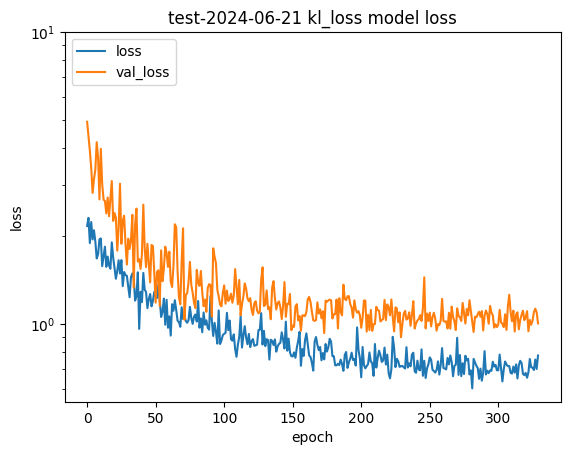

Val loss: 0.9004449844360352
Train loss: 0.7156391739845276
Test loss: 0.9377100467681885


NameError: name 'mean_squared_error' is not defined

In [64]:
tvim.train_variational_inference_model(params, fileset, ISOSCAPE_SAVE_LOCATION, MODEL_SAVE_LOCATION)